In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy
import time
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize, LogNorm
import matplotlib.cm as cm
import matplotlib as mpl
import scipy.special as special
import numpy.linalg as la
from numpy import fft
from scipy.linalg import solve



In [2]:
# #Parametri:

# def psi_0(x, alfa, lamb):
#     return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-alfa**2 * (x-lamb)**2 / 2)

# omega = 0.2
# lamb = 10.
# a = -40.
# b = 40.
# N = 300
# x = np.linspace(a, b, N)
# T = 2* np.pi / omega
# # dt = T / 1000


In [3]:
#analitična rešitev:
def psi_t(x, t, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-1/2 * (alfa * x - alfa * lamb * np.cos(omega * t))**2 - 1j * (omega*t/2 + alfa * x * alfa * lamb * np.sin(omega * t) - 1/4 * (alfa * lamb) **2 * np.sin(2*omega*t))) 

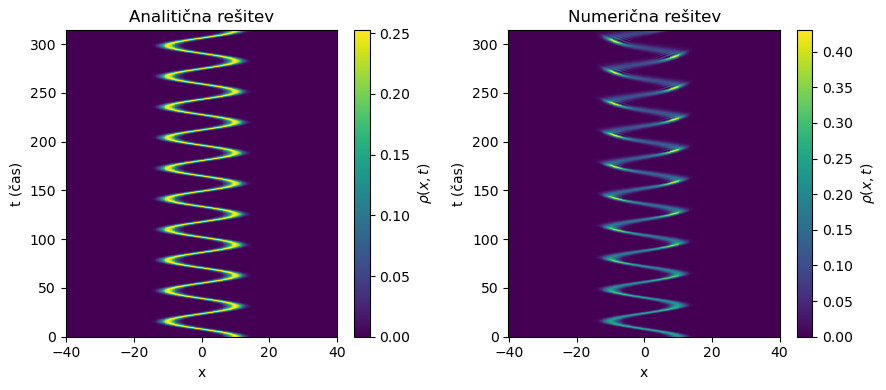

In [40]:
#prvi valovni paket

#analitična rešitev:
def psi_t(x, t, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-1/2 * (alfa * x - alfa * lamb * np.cos(omega * t))**2 - 1j * (omega*t/2 + alfa * x * alfa * lamb * np.sin(omega * t) - 1/4 * (alfa * lamb) **2 * np.sin(2*omega*t))) 

def psi_0(x, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-alfa**2 * (x-lamb)**2 / 2)

omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000
t = np.linspace(0, 10*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10


fig, axs = plt.subplots(1, 2, figsize=(9, 4))  

#anal:
z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
# print(la.norm(ros_a[0]))
im = axs[0].pcolormesh(x1, t1, ros_a, cmap='viridis')
colorbar = plt.colorbar(im, ax=axs[0], label=r'$\rho(x,t)$')
# plt.colorbar(label='Z value')

#numerical:
V = 1/2 * k * x**2
b = 1j * dt/(2*dx**2)
a = -b/2
diag= 1 + b + 1j * dt/2 * V
A = np.diag(np.ones(N-1) * a,1) + np.diag(np.ones(N-1) * a,-1) + np.diag(diag)
Ak = np.conjugate(np.transpose(A)) #hermitirana
# print(A)
# print(Ak)
psis = []
ros = []
psi = psi_0(x, alfa, lamb)
for i in range(Nt):
    psis.append(psi)
    psi = la.solve(A, Ak @ psi)
    # psi = la.inv(A) @ Ak @ psi
    ro = np.abs(psi)**2
    ro = ro / np.sum(ro * dx)
    ros.append(ro)
    # psi = psi / la.norm(psi)
    # print(la.norm(psi))
# print(la.norm(ros[0]))
im = axs[1].pcolormesh(x1,t1, ros, cmap='viridis')
colorbar = plt.colorbar(im, ax=axs[1], label=r'$\rho(x,t)$')

axs[0].set_xlabel(r'x')   
axs[0].set_ylabel(r't (čas)')
axs[1].set_xlabel(r'x')
axs[1].set_ylabel(r't (čas)')
axs[0].set_title('Analitična rešitev')
axs[1].set_title('Numerična rešitev')

np.save('ros0a.npy', ros_a)
np.save('ros0.npy', ros)
np.save('psis0a.npy', z)
np.save('psis0.npy', psis)


plt.tight_layout()
plt.savefig('resitev1')
# print(t1)
# plt.pcolormesh(x1,t1, np.abs(psis)**2, cmap='viridis')
# plt.colorbar(label='Z value')


0.9999999999999999
3.7375
0.9999999999999999
1.0000000000000124


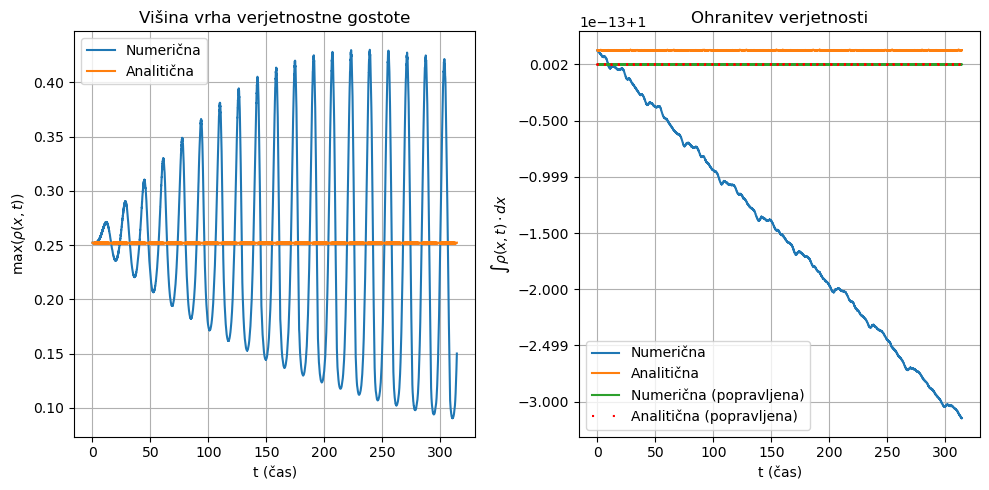

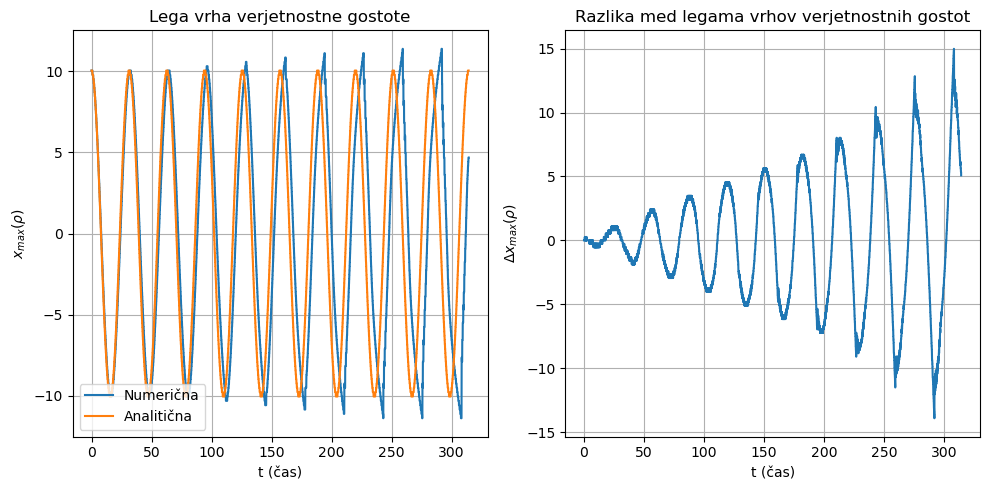

In [71]:
psis = np.load('psis0.npy')
ros = np.load('ros0.npy')
ros_a = np.load('ros0a.npy')
psis_a = np.load('psis0a.npy')

print(np.sum(ros_a[0]*dx))
print(np.sum(np.abs(psis_a[0])**2))
print(np.sum(ros[0]*dx))
print(np.sum(np.abs(psis[0])**2  *dx))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# for ind, psi in enumerate(psis):
maxi = np.max(np.abs(psis)**2, axis=1)
maxia = np.max(np.abs(psis_a)**2, axis=1)
axs[0].plot(t, maxi, label='Numerična')
axs[0].plot(t, maxia, label='Analitična')


axs[1].plot(t, np.sum(np.abs(psis)**2  *dx, axis=1), label='Numerična')
axs[1].plot(t, np.sum(np.abs(psis_a)**2  *dx, axis=1), label='Analitična')
axs[1].plot(t, np.sum(ros*dx, axis=1), label='Numerična (popravljena)')
axs[1].plot(t, np.sum(ros_a*dx, axis=1), label='Analitična (popravljena)', color='red', linestyle=(0, (1,9)))


axs[1].legend()
axs[0].legend()
axs[0].set_xlabel(r't (čas)')
axs[1].set_xlabel(r't (čas)')
axs[0].set_ylabel(r'max($\rho(x,t)$)')
axs[1].set_ylabel(r'$\int \rho(x,t) \cdot dx$')
axs[0].set_title('Višina vrha verjetnostne gostote')
axs[1].set_title('Ohranitev verjetnosti')
axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.savefig('visina_vrha')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

axs[0].plot(t, x[np.argmax(np.abs(psis)**2, axis=1)], label='Numerična')
axs[0].plot(t, x[np.argmax(np.abs(psis_a)**2, axis=1)], label='Analitična')

axs[1].plot(t, x[np.argmax(ros_a, axis=1)] - x[np.argmax(ros, axis=1)], label='analytical')
axs[0].legend(loc='lower left')

axs[0].set_xlabel(r't (čas)')
axs[1].set_xlabel(r't (čas)')
axs[0].set_ylabel(r'$x_{max}(\rho)$')
axs[1].set_ylabel(r'$\Delta x_{max}(\rho)$')
axs[0].set_title('Lega vrha verjetnostne gostote')
axs[1].set_title('Razlika med legama vrhov verjetnostnih gostot')
axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.savefig('lega_vrha')



In [12]:
#prvi valovni paket

#analitična rešitev:
def psi_t(x, t, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-1/2 * (alfa * x - alfa * lamb * np.cos(omega * t))**2 - 1j * (omega*t/2 + alfa * x * alfa * lamb * np.sin(omega * t) - 1/4 * (alfa * lamb) **2 * np.sin(2*omega*t))) 

def psi_0(x, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-alfa**2 * (x-lamb)**2 / 2)

omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000

t = np.linspace(0, 1*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10

#Za t = T
#anal:
z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
np.save('ros_a1', ros_a)
# print(la.norm(ros_a[0]))
# plt.pcolormesh(x1, t1, ros_a, cmap='viridis')
# plt.colorbar(label='Z value')

#numerical:
plt.figure()
all_psis = []
all_ros = []
Ns = np.arange(10,105,1)
Ns = [10000]
Ns = [100, 1000, 10000]

Ns = np.round(np.logspace(1,4,20)).astype(int)

for Nt in Ns:

    t = np.linspace(0, 1*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    b = 1j * dt/(2*dx**2)
    a = -b/2
    diag= 1 + b + 1j * dt/2 * V
    A = np.diag(np.ones(N-1) * a,1) + np.diag(np.ones(N-1) * a,-1) + np.diag(diag)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    psis = []
    ros = []
    psi = psi_0(x, alfa, lamb)
    for i in range(Nt):
        psis.append(psi)
        psi = la.solve(A, Ak @ psi)
        # psi = la.inv(A) @ Ak @ psi
        ro = np.abs(psi)**2
        ro = ro / np.sum(ro * dx)
        ros.append(ro)
        # psi = psi / la.norm(psi)
        # print(la.norm(psi))
    # print(la.norm(ros[0]))
    # plt.pcolormesh(x1,t1, ros, cmap='viridis')
    # print(t1)
    all_psis.append(psis[-1])
    all_ros.append(ros[-1])
np.save('all_psis1', all_psis)
np.save('all_ros1', all_ros)

# plt.pcolormesh(x1,t1, np.abs(psis)**2, cmap='viridis')
# plt.colorbar(label='Z value')


#Za t = 10*T
t = np.linspace(0, 10*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

#anal:
z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
np.save('ros_a2', ros_a)
# print(la.norm(ros_a[0]))
# plt.pcolormesh(x1, t1, ros_a, cmap='viridis')
# plt.colorbar(label='Z value')

#numerical:
plt.figure()
all_psis = []
all_ros = []

for Nt in Ns:

    t = np.linspace(0, 10*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    b = 1j * dt/(2*dx**2)
    a = -b/2
    diag= 1 + b + 1j * dt/2 * V
    A = np.diag(np.ones(N-1) * a,1) + np.diag(np.ones(N-1) * a,-1) + np.diag(diag)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    psis = []
    ros = []
    psi = psi_0(x, alfa, lamb)
    for i in range(Nt):
        psis.append(psi)
        psi = la.solve(A, Ak @ psi)
        # psi = la.inv(A) @ Ak @ psi
        ro = np.abs(psi)**2
        ro = ro / np.sum(ro * dx)
        ros.append(ro)
        # psi = psi / la.norm(psi)
        # print(la.norm(psi))
    # print(la.norm(ros[0]))
    # plt.pcolormesh(x1,t1, ros, cmap='viridis')
    # print(t1)
    all_psis.append(psis[-1])
    all_ros.append(ros[-1])
np.save('all_psis2', all_psis)
np.save('all_ros2', all_ros)
np.save('Ns', Ns)
# plt.pcolormesh(x1,t1, np.abs(psis)**2, cmap='viridis')
# plt.colorbar(label='Z value')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [34]:
all_psis = np.load('all_psis1.npy')
all_ros = np.load('all_ros1.npy')
ros_a = np.load('ros_a1.npy')

all_psis2 = np.load('all_psis2.npy')
all_ros2 = np.load('all_ros2.npy')
ros_a2 = np.load('ros_a2.npy')
# Ns = np.load('Ns.npy')


# print(ros_a2[0])


# fig, axs = plt.subplots(3, 1, figsize=(5, 12))  
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  

cmap = plt.get_cmap("copper_r")
norm = Normalize(vmin=min(Ns), vmax=max(Ns))
for ind,Nt in enumerate(Ns):
    axs[0,0].plot(x, all_ros[ind],color=cmap(norm(Nt)))
    # axs[0,1].plot(x, np.abs(all_psis[ind])**2,color=cmap(norm(Nt)))
    axs[0,1].plot(x, np.abs(all_ros[ind] - ros_a[-1]),color=cmap(norm(Nt)))
    axs[0,2].plot(x, np.abs(all_ros[ind] - ros_a[-1])/ros_a[-1],color=cmap(norm(Nt)))

axs[0,0].plot(x,ros_a[-1],color='red', linestyle='--', label='analitična  \n rešitev')

cax = fig.add_axes([1.0, 0.04, 0.02, 0.96])
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[1],location='right')
cbar.set_label(r'N (št. točk na časovni skali)', fontsize=12)

axs[0,1].set_yscale('log')
axs[0,2].set_yscale('log')
axs[0,0].set_xlabel(r'$x$', fontsize=12)
axs[0,1].set_xlabel(r'$x$', fontsize=12)
axs[0,2].set_xlabel(r'$x$', fontsize=12)
axs[0,0].set_ylabel(r'$\rho(x)$', fontsize=12)
axs[0,1].set_ylabel(r'$\rho(x) - \rho_{analitična}(x)$', fontsize=12)
axs[0,2].set_ylabel(r'$\frac{\rho(x) - \rho_{analitična}(x)}{\rho_{analitična}(x)}$', fontsize=12)
axs[0,0].set_title(r'Valovna funkcija ($t= t_0$)', fontsize=12)
axs[0,1].set_title(r'Absolutna napaka ($t= t_0$)', fontsize=12)
axs[0,2].set_title(r'Relativna napaka ($t= t_0$)', fontsize=12)
axs[0,0].legend(fontsize=12,loc='upper left')
axs[0,0].grid()
axs[0,1].grid()
axs[0,2].grid()
# axs[2].set_xlim(15,25)


cmap = plt.get_cmap("copper_r")
norm = Normalize(vmin=min(Ns), vmax=max(Ns))
for ind,Nt in enumerate(Ns):
    axs[1,0].plot(x, all_ros2[ind],color=cmap(norm(Nt)))
    # axs[0,1].plot(x, np.abs(all_psis[ind])**2,color=cmap(norm(Nt)))
    axs[1,1].plot(x, np.abs(all_ros2[ind] - ros_a2[0]),color=cmap(norm(Nt)))
    axs[1,2].plot(x, np.abs(all_ros2[ind] - ros_a2[0])/ros_a2[0],color=cmap(norm(Nt)))

axs[1,0].plot(x,ros_a2[0],color='red', linestyle='--', label='analitična \n rešitev')

# cax = fig.add_axes([1.0, 0.04, 0.02, 0.96])
# cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[1],location='right')
# cbar.set_label(r'N (št. točk na časovni skali)', fontsize=12)

axs[1,1].set_yscale('log')
axs[1,2].set_yscale('log')
axs[1,0].set_xlabel(r'$x$', fontsize=12)
axs[1,1].set_xlabel(r'$x$', fontsize=12)
axs[1,2].set_xlabel(r'$x$', fontsize=12)
axs[1,0].set_ylabel(r'$\rho(x)$', fontsize=12)
axs[1,1].set_ylabel(r'$\rho(x) - \rho_{analitična}(x)$', fontsize=12)
axs[1,2].set_ylabel(r'$\frac{\rho(x) - \rho_{analitična}(x)}{\rho_{analitična}(x)}$', fontsize=12)
axs[1,0].set_title(r'Valovna funkcija ($t=10 \cdot t_0$)', fontsize=12)
axs[1,1].set_title(r'Absolutna napaka ($t=10 \cdot t_0$)', fontsize=12)
axs[1,2].set_title(r'Relativna napaka ($t=10 \cdot t_0$)', fontsize=12)
axs[1,0].legend(fontsize=12,loc='upper left')
axs[1,0].grid()
axs[1,1].grid()
axs[1,2].grid()
# axs[2].set_xlim(15,25)



plt.tight_layout()
plt.savefig('napake', bbox_inches='tight')



/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_97571/2261260970.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


In [225]:
print(np.round(np.logspace(1,4,10)).astype(int))

[   10    22    46   100   215   464  1000  2154  4642 10000]


In [35]:
#časovna zahtevnost
omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000

t = np.linspace(0, 10*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10

z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
# np.save('ros_a_cas', ros_a)

all_time = []
all_err = []
all_err_metode = []
all_err_metode2 = []
Ns = [10,100,1000]
Ns = [10,100,1000,10000]
Ns = np.round(np.logspace(1,4,20)).astype(int)
for Nt in Ns:

    t = np.linspace(0, 1*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    b = 1j * dt/(2*dx**2)
    a = -b/2
    diag= 1 + b + 1j * dt/2 * V
    A = np.diag(np.ones(N-1) * a,1) + np.diag(np.ones(N-1) * a,-1) + np.diag(diag)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    time_temp = []
    for _ in range(4):
        start_time = time.time()

        psi = psi_0(x, alfa, lamb)
        for i in range(Nt):
            psi = la.solve(A, Ak @ psi)
            # psi = la.inv(A) @ Ak @ psi
            ro = np.abs(psi)**2
            ro = ro / np.sum(ro * dx)

        end_time = time.time()
        elapsed_time = end_time - start_time
        time_temp.append(elapsed_time)

    napaka = np.max(np.abs(ro - ros_a[-1]))
    all_err_metode.append(napaka)

    napaka2 = x[np.argmax(ro)] - x[np.argmax(ros_a[-1])]
    all_err_metode2.append(napaka2)

    all_time.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
    all_err.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
    print(Nt)
np.save("time", all_time)
np.save("err", all_err)
np.save("Ns", Ns)
np.save("all_err_metode", all_err_metode)
np.save("all_err_metode2", all_err_metode2)


10
14
21
30
43
62
89
127
183
264
379
546
785
1129
1624
2336
3360
4833
6952
10000


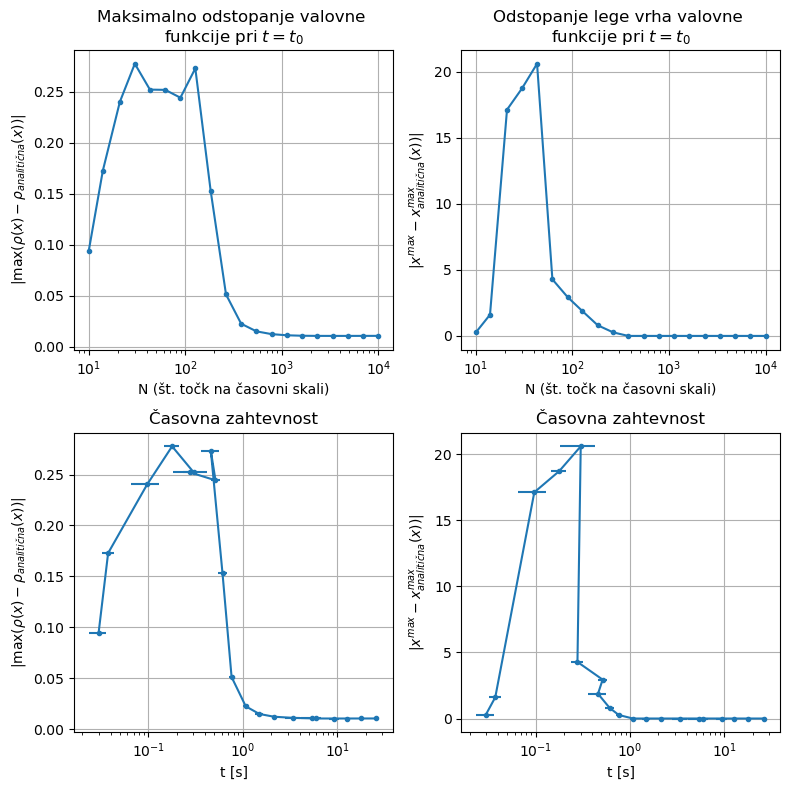

In [36]:
all_time  = np.load("time.npy")
all_err = np.load("err.npy")
Ns = np.load("Ns.npy")
all_err_metode = np.load("all_err_metode.npy")
all_err_metode2 = np.load("all_err_metode2.npy")


fig, axs = plt.subplots(1, 1, figsize=(6, 5))
axs.errorbar(Ns, all_time,yerr=all_err, linestyle='-', marker='.')

axs.set_yscale('log')
axs.set_xscale('log')
axs.set_title('Časovna zahtevnost metode')
axs.set_xlabel('N = št. točk na časovni skali')
axs.set_ylabel(r't [s]')
axs.grid()
plt.savefig('casovna1')

fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

axs[0,0].errorbar(Ns, np.abs(all_err_metode), linestyle='-', marker='.')
axs[1,0].errorbar(all_time, np.abs(all_err_metode),xerr=all_err, linestyle='-', marker='.')
axs[0,1].errorbar(Ns, np.abs(all_err_metode2), linestyle='-', marker='.')
axs[1,1].errorbar(all_time, np.abs(all_err_metode2),xerr=all_err, linestyle='-', marker='.')
# axs[2].errorbar(Ns, np.abs(all_err_metode2), linestyle='-', marker='.')

axs[0,0].set_xscale('log')
axs[1,0].set_xscale('log')

axs[0,0].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,0].set_title('Maksimalno odstopanje valovne \nfunkcije pri $t = t_0$')
axs[0,0].set_xlabel('N (št. točk na časovni skali)')
axs[0,0].set_ylabel(r'$|\max(\rho(x) - \rho_{analitična}(x))|$')
axs[0,0].grid()

axs[1,0].set_title('Časovna zahtevnost')
axs[1,0].set_xlabel(r't [s]')
axs[1,0].set_ylabel(r'$|\max(\rho(x) - \rho_{analitična}(x))|$')
axs[1,0].grid()
axs[1,0].set_xscale('log')

axs[0,1].set_xscale('log')
axs[1,1].set_xscale('log')

axs[0,1].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,1].set_title('Odstopanje lege vrha valovne \nfunkcije pri $t = t_0$')
axs[0,1].set_xlabel('N (št. točk na časovni skali)')
axs[0,1].set_ylabel(r'$|x^{max} - x^{max}_{analitična}(x))|$')
axs[0,1].grid()

axs[1,1].set_title('Časovna zahtevnost')
axs[1,1].set_xlabel(r't [s]')
axs[1,1].set_ylabel(r'$|x^{max} - x^{max}_{analitična}(x))|$')
axs[1,1].grid()
axs[1,1].set_xscale('log')
# axs[1,0].set_yscale('log')

plt.tight_layout()
plt.savefig('Casovna2')

<Figure size 640x480 with 0 Axes>

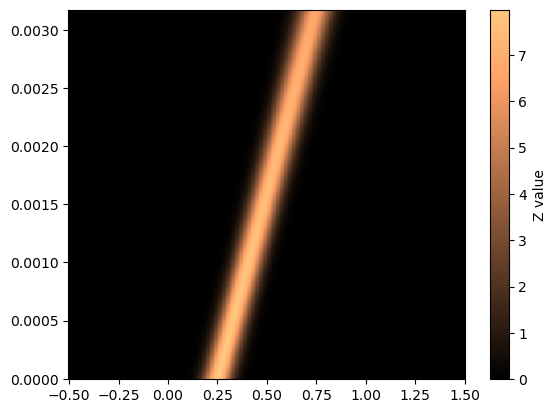

<Figure size 640x480 with 0 Axes>

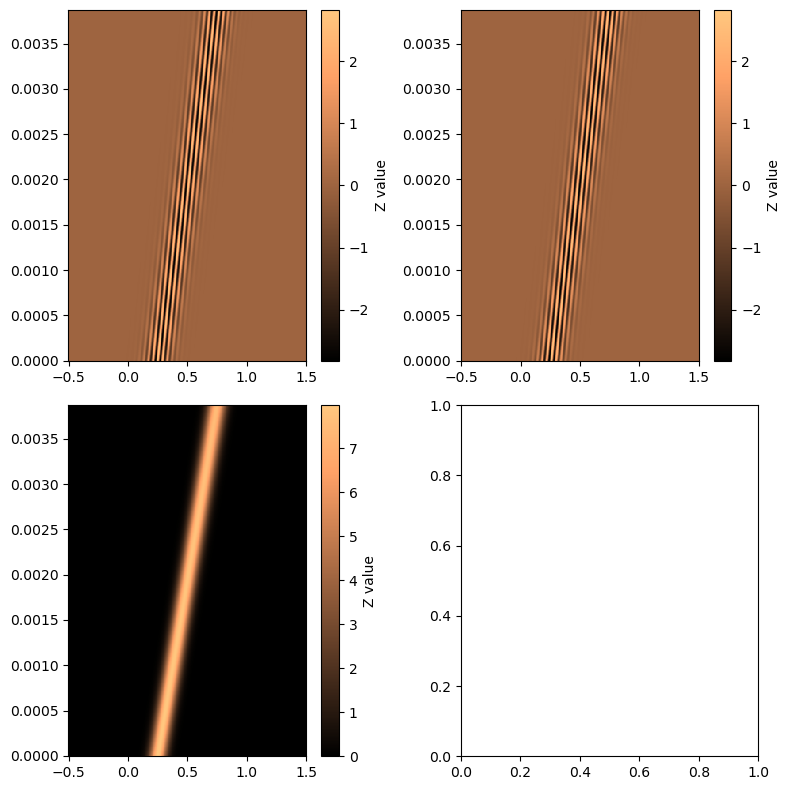

In [9]:
#drugi valovni paket

#analitična rešitev:
def psi_t(x, t, alfa, lamb, sigma0, k0):
    return np.ones_like(x) *  (2 * np.pi * sigma0**2)**(-1/4) / (np.sqrt(1+ 1j * t/(2*sigma0**2))) * np.exp((-(x-lamb)**2 / (2*sigma0)**2 + 1j * k0 * (x - lamb) - 1j * k0**2 * t/2)/(1 + 1j * t/(2*sigma0**2)))

def psi_0(x, alfa, lamb, sigma0, k0):
    return (2 * np.pi * sigma0**2)** (-1/4) * np.exp(1j * k0 * (x-lamb)) * np.exp(-(x-lamb)**2 / (2 * sigma0)**2)

sigma0 = 1/20
# sigma0 = 1
k0 = 50 * np.pi
omega = 0.2
k = omega ** 2
lamb = 0.25
alfa = np.sqrt(omega)
a = -0.5
b = 1.5
# N = 1000
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
# Nt = 10000
dt = 2*dx**2/10
# t = np.linspace(0, 1*T, Nt)
t = np.arange(0,1*T, dt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)


#anal:
plt.figure()
psis = []
ti = 0
psi =psi_t(x, ti, alfa, lamb, sigma0, k0)
xav = x[np.argmax(psi)]
psis.append(psi)
ts = [ti]
xavs = [xav]
while xav < 0.75:
    ti = ti + dt
    z = psi_t(x, ti, alfa, lamb, sigma0, k0)
    psis.append(z)
    ts.append(ti)
    xav = x[np.argmax(np.abs(z))]
    xavs.append(xav)
    # plt.plot(x, np.abs(z)**2)
    # print(xav)
# print(len(ts))
x1, t1 = np.meshgrid(x, ts)
psis = np.array(psis)
# print(psis)
# z0 = psi_0(x, alfa, lamb, sigma0, k0)
# print(np.shape(z0))
plt.figure()
plt.pcolormesh(x1, t1, np.abs(psis)**2, cmap='copper')
plt.colorbar(label='Z value')
# plt.imshow(np.abs(psis)**2, cmap='viridis', extent=[0,1,0,1])
np.save('x_1a', x)
np.save('ts_1a', ts)
np.save('psis_1a', psis)
np.save('xavs_1a', xavs)


# plt.figure()
# plt.plot(x, np.abs(z[-1,:])**2)    
# plt.plot(x, np.abs(z0)**2)    
# plt.yscale('log')
# print(x,np.abs(z0)**2)


#numerical:
#ce najprej zmnozimo vektor
plt.figure()
V = np.zeros_like(x)
b = 1j * dt/(2*dx**2)
a = -b/2
diag= 1 + b + 1j * dt/2 * V
A = np.diag(np.ones(N-1) * a,1) + np.diag(np.ones(N-1) * a,-1) + np.diag(diag)
Ak = np.conjugate(np.transpose(A)) #hermitirana
# main_d = np.ones(N) * a
# submain_d = np.ones(N-2) * a
# A_banded = np.vstack((submain_d, main_d, submain_d))

# print(A)
# print(Ak)

psis = []
ti = 0
psi =psi_t(x, ti, alfa, lamb, sigma0, k0)
xav = x[np.argmax(psi)]
psis.append(psi)
# psi = psi_0(x, alfa, lamb, sigma0, k0)
c = 0
ts = [ti]
xavs = [xav]
while xav < 0.75:
    ti = ti + dt
    z = psi_t(x, ti, alfa, lamb, sigma0, k0)
    # psi = scipy.linalg.solve_banded((1,1),A_banded, Ak @ psi)
    psi = la.solve(A, Ak @ psi)
    # psi = psi / la.norm(psi)
    ts.append(ti)
    psis.append(psi)
    xav = x[np.argmax(np.abs(psi))]
    xavs.append(xav)
    # print(xav)
    # plt.plot(x, np.abs(psi)**2)
    # print(xav)
    # if c == 100000:
    #     break
    # c += 1
# print(len(ts))
x1, t1 = np.meshgrid(x, ts)
np.save('x_1', x)
np.save('ts_1', ts)
np.save('psis_1', psis)
np.save('xavs_1', xavs)



# for i in range(Nt):
#     psis.append(psi)
#     psi = la.solve(A, Ak @ psi)
#     # psi = la.inv(A) @ Ak @ psi
#     psi = psi / la.norm(psi)
# plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

mesh = axs[0,0].pcolormesh(x1,t1, np.real(psis), cmap='copper')
plt.colorbar(mesh, label='Z value', ax=axs[0,0])

mesh = axs[0,1].pcolormesh(x1,t1, np.imag(psis), cmap='copper')
plt.colorbar(mesh, label='Z value', ax=axs[0,1])

mesh = axs[1,0].pcolormesh(x1,t1, np.abs(psis)**2, cmap='copper')
plt.colorbar(mesh, label='Z value', ax=axs[1,0])
plt.tight_layout()




/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_97571/1175768253.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


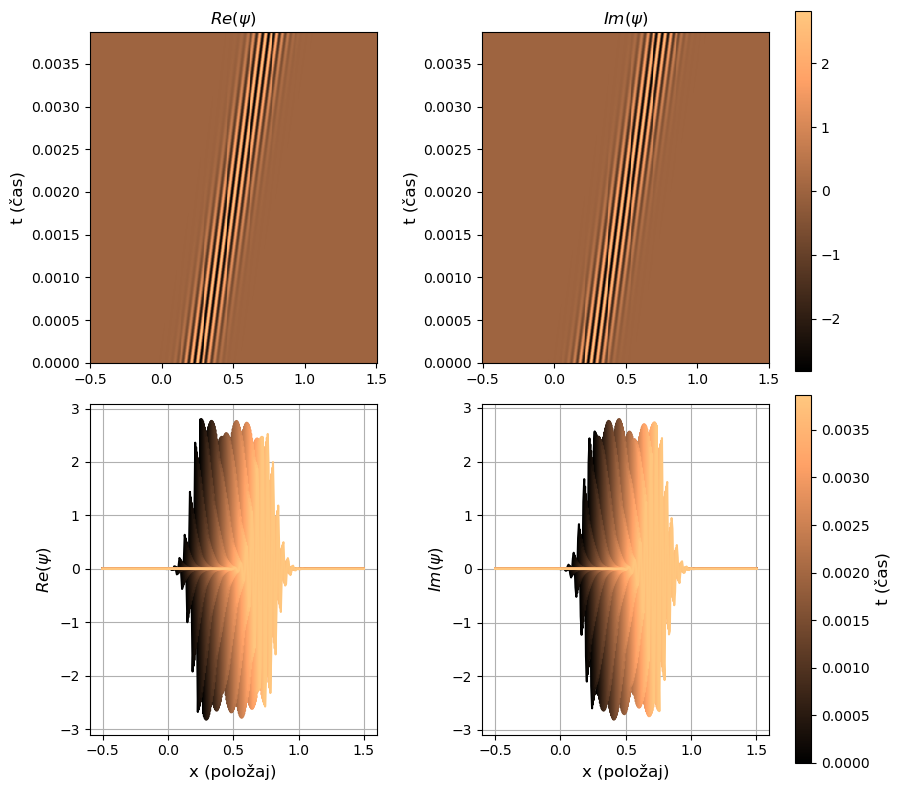

In [32]:

#anal:
xa = np.load('x_1a.npy')
tsa = np.load('ts_1a.npy')   
psisa = np.load('psis_1a.npy')
xavsa = np.load('xavs_1a.npy')

#numerical:
x = np.load('x_1.npy')
ts = np.load('ts_1.npy')
psis = np.load('psis_1.npy')
xavs = np.load('xavs_1.npy')

x1, t1 = np.meshgrid(x, ts)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

mesh = axs[0,0].pcolormesh(x1,t1, np.real(psis), cmap='copper')
# plt.colorbar(mesh, label='Z value', ax=axs[0,0])

mesh = axs[0,1].pcolormesh(x1,t1, np.imag(psis), cmap='copper')
cax = fig.add_axes([1.0, 0.53, 0.02, 0.45])

cmap = plt.get_cmap("copper")
norm = Normalize(vmin=np.min(np.imag(psis)), vmax=np.max(np.imag(psis)))
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[0,1],location='right')
cbar.set_label(r'', fontsize=12)

# plt.colorbar(mesh, label='Z value', ax=axs[0,1])

cmap = plt.get_cmap("copper")
norm = Normalize(vmin=min(ts), vmax=max(ts))
for ind,psi in enumerate(psis):
    if ind % 10 == 0:
        # print(ind)
        # axs[1,1].plot(x, np.abs(psi)**2,color=cmap(norm(ts[ind])))#, label=f'{ts[ind]:.2f}')
        axs[1,0].plot(x, np.real(psi),color=cmap(norm(ts[ind])))#, label=f'{ts[ind]:.2f}')
        axs[1,1].plot(x, np.imag(psi),color=cmap(norm(ts[ind])))#, label=f'{ts[ind]:.2f}')
cax = fig.add_axes([1.0, 0.04, 0.02, 0.46])

cmap = plt.get_cmap("copper")
norm = Normalize(vmin=min(ts), vmax=max(ts[1:]))
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[1,1],location='right')
cbar.set_label(r't (čas)', fontsize=12)

# cax = fig.add_axes([0.5, 0.04, 0.02, 0.46])

# cmap = plt.get_cmap("copper")
# norm = Normalize(vmin=min(ts), vmax=max(ts[1:]))
# cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[0,1],location='right')
# cbar.set_label(r't (čas)', fontsize=12)

axs[1,0].grid()
axs[1,1].grid()
axs[1,0].set_xlabel(r'x (položaj)', fontsize=12)
axs[1,1].set_xlabel(r'x (položaj)', fontsize=12)
axs[1,0].set_ylabel(r'$Re(\psi)$', fontsize=12)
axs[1,1].set_ylabel(r'$Im(\psi)$', fontsize=12)
axs[0,0].set_ylabel(r't (čas)', fontsize=12)
axs[0,1].set_ylabel(r't (čas)', fontsize=12)
axs[0,0].set_title(r'$Re(\psi)$', fontsize=12)
axs[0,1].set_title(r'$Im(\psi)$', fontsize=12)


# mesh = axs[1,0].plot(x1,t1, np.abs(psis)**2, cmap='copper')
# plt.colorbar(mesh, label='Z value', ax=axs[1,0])
plt.tight_layout()
plt.savefig("brez_pot_2",bbox_inches='tight')


433


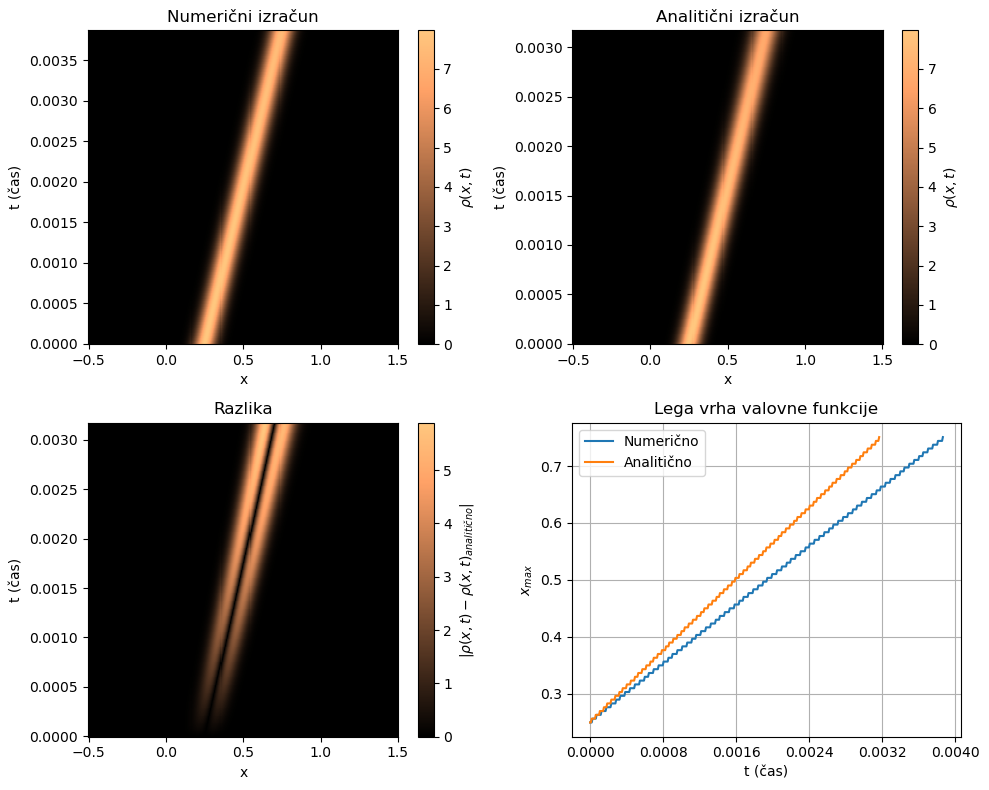

In [31]:
#anal:
xa = np.load('x_1a.npy')
tsa = np.load('ts_1a.npy')   
psisa = np.load('psis_1a.npy')
xavsa = np.load('xavs_1a.npy')

#numerical:
x = np.load('x_1.npy')
ts = np.load('ts_1.npy')
psis = np.load('psis_1.npy')
xavs = np.load('xavs_1.npy')

# x = x[:len(tsa)]
ts_d = ts[:len(tsa)]
psis_d = psis[:len(tsa)]

print(len(psis))


diff = []
for ind, t in enumerate(ts_d):
    diff.append(np.abs(np.abs(psis_d[ind])**2 - np.abs(psisa[ind])**2))
    # diff.append(np.abs(np.real(psis_d[ind]) - np.real(psisa[ind])))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  

xd, td = np.meshgrid(x, ts_d)

x1,t1 = np.meshgrid(x, ts)
x2,t2 = np.meshgrid(xa, tsa)

mesh1 = axs[0,0].pcolormesh(x1,t1, np.abs(psis)**2, cmap='copper')
mesh2 = axs[0,1].pcolormesh(x2,t2, np.abs(psisa)**2, cmap='copper')


mesh = axs[1,0].pcolormesh(xd,td, diff, cmap='copper')
plt.colorbar(mesh, label=r'$|\rho(x,t) - \rho(x,t)_{analitično}|$', ax=axs[1,0])
plt.colorbar(mesh1, label=r'$\rho(x,t)$', ax=axs[0,0])
plt.colorbar(mesh2, label=r'$\rho(x,t)$', ax=axs[0,1])



axs[1,1].plot(ts, xavs, label='Numerično')
axs[1,1].plot(tsa, xavsa, label='Analitično')
axs[1,1].legend()
axs[1,1].grid()

# from matplotlib.ticker import FormatStrFormatter

axs[1,1].xaxis.set_major_locator(plt.MaxNLocator(6))

axs[0,0].set_xlabel(r'x')
axs[0,1].set_xlabel(r'x')
axs[1,0].set_xlabel(r'x')
axs[1,1].set_xlabel(r't (čas)')
axs[0,0].set_ylabel(r't (čas)')
axs[0,1].set_ylabel(r't (čas)')
axs[1,0].set_ylabel(r't (čas)')
axs[1,1].set_ylabel(r'$x_{max}$')
axs[0,0].set_title(r'Numerični izračun')
axs[0,1].set_title(r'Analitični izračun')
axs[1,0].set_title(r'Razlika')
axs[1,1].set_title(r'Lega vrha valovne funkcije')

plt.tight_layout()
plt.savefig('brez_pot_1')


In [ ]:
#naredi še, višji red odvodi, razlika v 2d plotu za harmonskega, do konca ta graf zgori, višina (oscilacije višine paketa, za ohranjanje verjetnosti)

In [73]:
#prvi valovni paket

#analitična rešitev:
def psi_t(x, t, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-1/2 * (alfa * x - alfa * lamb * np.cos(omega * t))**2 - 1j * (omega*t/2 + alfa * x * alfa * lamb * np.sin(omega * t) - 1/4 * (alfa * lamb) **2 * np.sin(2*omega*t))) 

def psi_0(x, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-alfa**2 * (x-lamb)**2 / 2)

omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000
t = np.linspace(0, 10*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10


fig, axs = plt.subplots(1, 3, figsize=(12, 4))  

#anal:
z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
# print(la.norm(ros_a[0]))
im = axs[0].pcolormesh(x1, t1, ros_a, cmap='viridis')
colorbar = plt.colorbar(im, ax=axs[0], label=r'$\rho(x,t)$')
# plt.colorbar(label='Z value')

#numerical:
V = 1/2 * k * x**2
# b = 1j * dt/(2*dx**2)
# a = -b/2
d0 = 1 + 1j*dt*5/ (8*dx**2) + 1j * dt/2 * V
d1 = - 1j * dt / (3*dx**2)
d2 = 1j * dt / (48*dx**2)
A = + np.diag(d0) + np.diag(np.ones(N-1) * d1,1) + np.diag(np.ones(N-1) * d1,-1) + np.diag(np.ones(N-2) * d2,2) + np.diag(np.ones(N-2) * d2,-2)
Ak = np.conjugate(np.transpose(A)) #hermitirana
# print(A)
# print(Ak)
psis = []
ros = []
psi = psi_0(x, alfa, lamb)
for i in range(Nt):
    psis.append(psi)
    psi = la.solve(A, Ak @ psi)
    # psi = la.inv(A) @ Ak @ psi
    ro = np.abs(psi)**2
    ro = ro / np.sum(ro * dx)
    ros.append(ro)
    # psi = psi / la.norm(psi)
    # print(la.norm(psi))
# print(la.norm(ros[0]))
im = axs[2].pcolormesh(x1,t1, ros, cmap='viridis')
colorbar = plt.colorbar(im, ax=axs[2], label=r'$\rho(x,t)$')

np.save('ros01a.npy', ros_a)
np.save('ros01.npy', ros)
np.save('psis01a.npy', z)
np.save('psis01.npy', psis)

axs[0].set_xlabel(r'x')   
axs[0].set_ylabel(r't (čas)')
axs[1].set_xlabel(r'x')
axs[1].set_ylabel(r't (čas)')
axs[0].set_title('Analitična rešitev')
axs[1].set_title('Numerična rešitev')

ros0 = np.load('ros0.npy')
im = axs[1].pcolormesh(x1,t1, ros0, cmap='viridis')
colorbar = plt.colorbar(im, ax=axs[1], label=r'$\rho(x,t)$')


axs[2].set_xlabel(r'x')
axs[2].set_ylabel(r't (čas)')
axs[2].set_title('Numerična rešitev višjega reda')

plt.tight_layout()
plt.savefig('resitev10_visji')
# print(t1)
# plt.pcolormesh(x1,t1, np.abs(psis)**2, cmap='viridis')
# plt.colorbar(label='Z value')


In [72]:
psis1 = np.load('psis01.npy')
ros1 = np.load('ros01.npy')
ros_a1 = np.load('ros01a.npy')
psis_a1 = np.load('psis01a.npy')

psis = np.load('psis0.npy')
ros = np.load('ros0.npy')
ros_a = np.load('ros0a.npy')
psis_a = np.load('psis0a.npy')

print(np.sum(ros_a[0]*dx))
print(np.sum(np.abs(psis_a[0])**2))
print(np.sum(ros[0]*dx))
print(np.sum(np.abs(psis[0])**2  *dx))
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

# for ind, psi in enumerate(psis):
maxi = np.max(np.abs(psis)**2, axis=1)
maxi1 = np.max(np.abs(psis1)**2, axis=1)
maxia = np.max(np.abs(psis_a)**2, axis=1)
axs[0].plot(t, maxi, label='Numerična')
axs[0].plot(t, maxi1, label='Numerična višjega reda')
axs[0].plot(t, maxia, label='Analitična')


axs[1].plot(t, np.sum(np.abs(psis)**2  *dx, axis=1), label='Numerična')
axs[1].plot(t, np.sum(np.abs(psis1)**2  *dx, axis=1), label='Numerična višjega reda')
axs[1].plot(t, np.sum(np.abs(psis_a)**2  *dx, axis=1), label='Analitična')
# axs[1].plot(t, np.sum(ros*dx, axis=1), label='Numerična (popravljena)')
# axs[1].plot(t, np.sum(ros_a*dx, axis=1), label='Analitična (popravljena)', color='red', linestyle=(0, (1,9)))


axs[1].legend()
axs[0].legend()
axs[0].set_xlabel(r't (čas)')
axs[1].set_xlabel(r't (čas)')
axs[0].set_ylabel(r'max($\rho(x,t)$)')
axs[1].set_ylabel(r'$\int \rho(x,t) \cdot dx$')
axs[0].set_title('Višina vrha verjetnostne gostote')
axs[1].set_title('Ohranitev verjetnosti')
axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.savefig('visina_vrha_visji')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))  

axs[0].plot(t, x[np.argmax(np.abs(psis_a)**2, axis=1)], label='Analitična')
axs[0].plot(t, x[np.argmax(np.abs(psis)**2, axis=1)], label='Numerična', linestyle='dotted')
axs[0].plot(t, x[np.argmax(np.abs(psis1)**2, axis=1)], label='Numerična višjega reda', linestyle='dotted')

axs[1].plot(t, x[np.argmax(ros_a, axis=1)] - x[np.argmax(ros, axis=1)], label='Nižji red')
axs[1].plot(t, x[np.argmax(ros_a, axis=1)] - x[np.argmax(ros1, axis=1)], label='Višji red')
axs[0].legend(loc='lower left')
axs[1].legend(loc='lower left')

axs[0].set_xlabel(r't (čas)')
axs[1].set_xlabel(r't (čas)')
axs[0].set_ylabel(r'$x_{max}(\rho)$')
axs[1].set_ylabel(r'$\Delta x_{max}(\rho)$')
axs[0].set_title('Lega vrha verjetnostne gostote')
axs[1].set_title('Razlika med legama vrhov verjetnostnih gostot')
axs[0].grid()
axs[1].grid()

plt.tight_layout()
plt.savefig('lega_vrha_visji')



0.9999999999999999
3.7375
0.9999999999999999
1.0000000000000124


In [56]:
#prvi valovni paket

#analitična rešitev:
def psi_t(x, t, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-1/2 * (alfa * x - alfa * lamb * np.cos(omega * t))**2 - 1j * (omega*t/2 + alfa * x * alfa * lamb * np.sin(omega * t) - 1/4 * (alfa * lamb) **2 * np.sin(2*omega*t))) 

def psi_0(x, alfa, lamb):
    return np.sqrt(alfa/np.sqrt(np.pi)) * np.exp(-alfa**2 * (x-lamb)**2 / 2)

omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000

t = np.linspace(0, 1*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10

#Za t = T
#anal:
z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
np.save('ros_a11', ros_a)
# print(la.norm(ros_a[0]))
# plt.pcolormesh(x1, t1, ros_a, cmap='viridis')
# plt.colorbar(label='Z value')

#numerical:
plt.figure()
all_psis = []
all_ros = []
Ns = np.arange(10,105,1)
Ns = [10000]
Ns = [100, 1000, 10000]

Ns = np.round(np.logspace(1,4,20)).astype(int)

for Nt in Ns:

    t = np.linspace(0, 1*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    b = 1j * dt/(2*dx**2)
    a = -b/2
    d0 = 1 + 1j*dt*5/ (8*dx**2) + 1j * dt/2 * V
    d1 = - 1j * dt / (3*dx**2)
    d2 = 1j * dt / (48*dx**2)
    A = + np.diag(d0) + np.diag(np.ones(N-1) * d1,1) + np.diag(np.ones(N-1) * d1,-1) + np.diag(np.ones(N-2) * d2,2) + np.diag(np.ones(N-2) * d2,-2)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    psis = []
    ros = []
    psi = psi_0(x, alfa, lamb)
    for i in range(Nt):
        psis.append(psi)
        psi = la.solve(A, Ak @ psi)
        # psi = la.inv(A) @ Ak @ psi
        ro = np.abs(psi)**2
        ro = ro / np.sum(ro * dx)
        ros.append(ro)
        # psi = psi / la.norm(psi)
        # print(la.norm(psi))
    # print(la.norm(ros[0]))
    # plt.pcolormesh(x1,t1, ros, cmap='viridis')
    # print(t1)
    all_psis.append(psis[-1])
    all_ros.append(ros[-1])
np.save('all_psis11', all_psis)
np.save('all_ros11', all_ros)

# plt.pcolormesh(x1,t1, np.abs(psis)**2, cmap='viridis')
# plt.colorbar(label='Z value')


#Za t = 10*T
t = np.linspace(0, 10*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

#anal:
z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
np.save('ros_a2', ros_a)
# print(la.norm(ros_a[0]))
# plt.pcolormesh(x1, t1, ros_a, cmap='viridis')
# plt.colorbar(label='Z value')

#numerical:
plt.figure()
all_psis = []
all_ros = []

for Nt in Ns:

    t = np.linspace(0, 10*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    d0 = 1 + 1j*dt*5/ (8*dx**2) + 1j * dt/2 * V
    d1 = - 1j * dt / (3*dx**2)
    d2 = 1j * dt / (48*dx**2)
    A = + np.diag(d0) + np.diag(np.ones(N-1) * d1,1) + np.diag(np.ones(N-1) * d1,-1) + np.diag(np.ones(N-2) * d2,2) + np.diag(np.ones(N-2) * d2,-2)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    psis = []
    ros = []
    psi = psi_0(x, alfa, lamb)
    for i in range(Nt):
        psis.append(psi)
        psi = la.solve(A, Ak @ psi)
        # psi = la.inv(A) @ Ak @ psi
        ro = np.abs(psi)**2
        ro = ro / np.sum(ro * dx)
        ros.append(ro)
        # psi = psi / la.norm(psi)
        # print(la.norm(psi))
    # print(la.norm(ros[0]))
    # plt.pcolormesh(x1,t1, ros, cmap='viridis')
    # print(t1)
    all_psis.append(psis[-1])
    all_ros.append(ros[-1])
np.save('all_psis21', all_psis)
np.save('all_ros21', all_ros)
np.save('Ns1', Ns)
# plt.pcolormesh(x1,t1, np.abs(psis)**2, cmap='viridis')
# plt.colorbar(label='Z value')


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_97571/3607458857.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


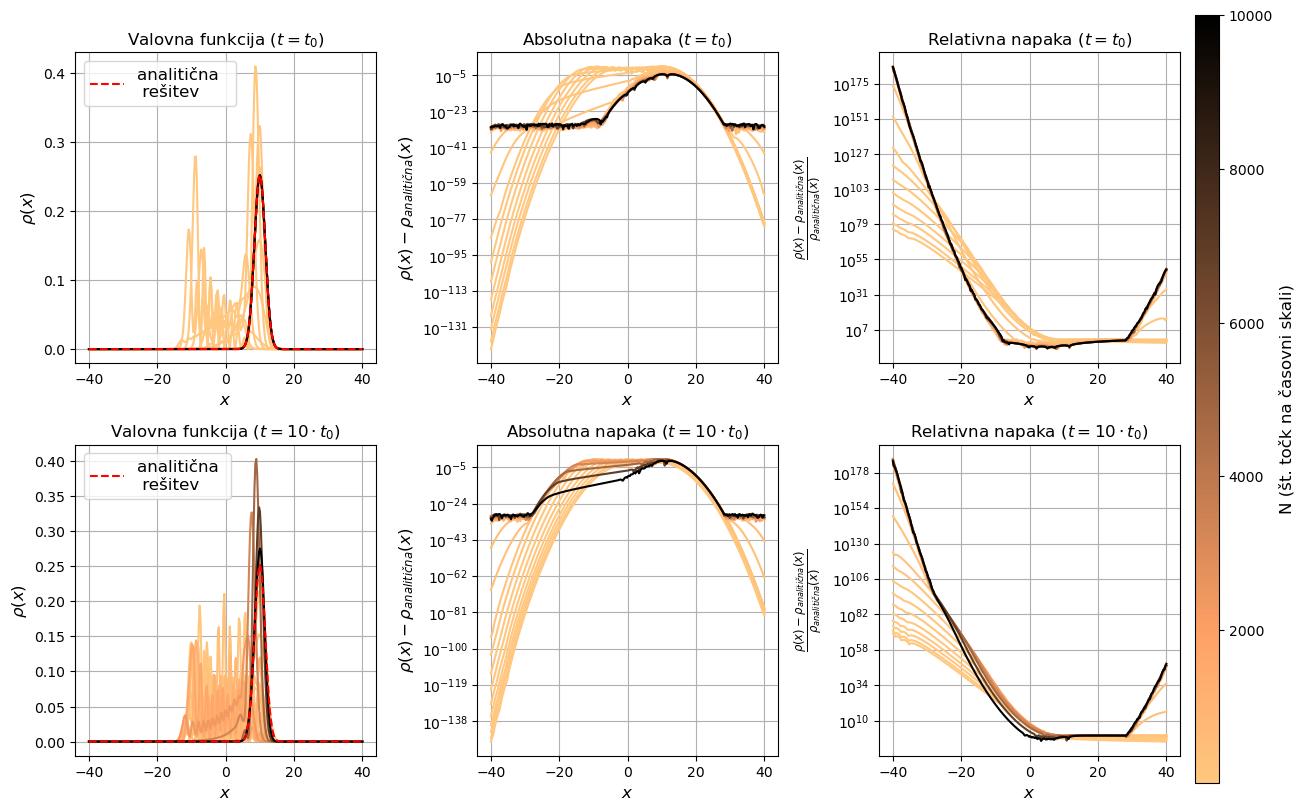

In [74]:
all_psis = np.load('all_psis11.npy')
all_ros = np.load('all_ros11.npy')
ros_a = np.load('ros_a11.npy')

all_psis2 = np.load('all_psis21.npy')
all_ros2 = np.load('all_ros21.npy')
ros_a2 = np.load('ros_a2.npy')
Ns = np.load('Ns1.npy')


# print(ros_a2[0])


# fig, axs = plt.subplots(3, 1, figsize=(5, 12))  
fig, axs = plt.subplots(2, 3, figsize=(12, 8))  

cmap = plt.get_cmap("copper_r")
norm = Normalize(vmin=min(Ns), vmax=max(Ns))
for ind,Nt in enumerate(Ns):
    axs[0,0].plot(x, all_ros[ind],color=cmap(norm(Nt)))
    # axs[0,1].plot(x, np.abs(all_psis[ind])**2,color=cmap(norm(Nt)))
    axs[0,1].plot(x, np.abs(all_ros[ind] - ros_a[-1]),color=cmap(norm(Nt)))
    axs[0,2].plot(x, np.abs(all_ros[ind] - ros_a[-1])/ros_a[-1],color=cmap(norm(Nt)))

axs[0,0].plot(x,ros_a[-1],color='red', linestyle='--', label='analitična  \n rešitev')

cax = fig.add_axes([1.0, 0.04, 0.02, 0.96])
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[1],location='right')
cbar.set_label(r'N (št. točk na časovni skali)', fontsize=12)

axs[0,1].set_yscale('log')
axs[0,2].set_yscale('log')
axs[0,0].set_xlabel(r'$x$', fontsize=12)
axs[0,1].set_xlabel(r'$x$', fontsize=12)
axs[0,2].set_xlabel(r'$x$', fontsize=12)
axs[0,0].set_ylabel(r'$\rho(x)$', fontsize=12)
axs[0,1].set_ylabel(r'$\rho(x) - \rho_{analitična}(x)$', fontsize=12)
axs[0,2].set_ylabel(r'$\frac{\rho(x) - \rho_{analitična}(x)}{\rho_{analitična}(x)}$', fontsize=12)
axs[0,0].set_title(r'Valovna funkcija ($t= t_0$)', fontsize=12)
axs[0,1].set_title(r'Absolutna napaka ($t= t_0$)', fontsize=12)
axs[0,2].set_title(r'Relativna napaka ($t= t_0$)', fontsize=12)
axs[0,0].legend(fontsize=12,loc='upper left')
axs[0,0].grid()
axs[0,1].grid()
axs[0,2].grid()
# axs[2].set_xlim(15,25)


cmap = plt.get_cmap("copper_r")
norm = Normalize(vmin=min(Ns), vmax=max(Ns))
for ind,Nt in enumerate(Ns):
    axs[1,0].plot(x, all_ros2[ind],color=cmap(norm(Nt)))
    # axs[0,1].plot(x, np.abs(all_psis[ind])**2,color=cmap(norm(Nt)))
    axs[1,1].plot(x, np.abs(all_ros2[ind] - ros_a2[0]),color=cmap(norm(Nt)))
    axs[1,2].plot(x, np.abs(all_ros2[ind] - ros_a2[0])/ros_a2[0],color=cmap(norm(Nt)))

axs[1,0].plot(x,ros_a2[0],color='red', linestyle='--', label='analitična \n rešitev')

# cax = fig.add_axes([1.0, 0.04, 0.02, 0.96])
# cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[1],location='right')
# cbar.set_label(r'N (št. točk na časovni skali)', fontsize=12)

axs[1,1].set_yscale('log')
axs[1,2].set_yscale('log')
axs[1,0].set_xlabel(r'$x$', fontsize=12)
axs[1,1].set_xlabel(r'$x$', fontsize=12)
axs[1,2].set_xlabel(r'$x$', fontsize=12)
axs[1,0].set_ylabel(r'$\rho(x)$', fontsize=12)
axs[1,1].set_ylabel(r'$\rho(x) - \rho_{analitična}(x)$', fontsize=12)
axs[1,2].set_ylabel(r'$\frac{\rho(x) - \rho_{analitična}(x)}{\rho_{analitična}(x)}$', fontsize=12)
axs[1,0].set_title(r'Valovna funkcija ($t=10 \cdot t_0$)', fontsize=12)
axs[1,1].set_title(r'Absolutna napaka ($t=10 \cdot t_0$)', fontsize=12)
axs[1,2].set_title(r'Relativna napaka ($t=10 \cdot t_0$)', fontsize=12)
axs[1,0].legend(fontsize=12,loc='upper left')
axs[1,0].grid()
axs[1,1].grid()
axs[1,2].grid()
# axs[2].set_xlim(15,25)



plt.tight_layout()
plt.savefig('napake_visji', bbox_inches='tight')



In [59]:
#časovna zahtevnost
omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000

t = np.linspace(0, 1*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10

z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
# np.save('ros_a_cas', ros_a)

all_time = []
all_err = []
all_err_metode = []
all_err_metode2 = []
Ns = [10,100,1000]
Ns = [10,100,1000,10000]
Ns = np.round(np.logspace(1,4,20)).astype(int)
for Nt in Ns:

    t = np.linspace(0, 1*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    b = 1j * dt/(2*dx**2)
    a = -b/2
    d0 = 1 + 1j*dt*5/ (8*dx**2) + 1j * dt/2 * V
    d1 = - 1j * dt / (3*dx**2)
    d2 = 1j * dt / (48*dx**2)
    A = + np.diag(d0) + np.diag(np.ones(N-1) * d1,1) + np.diag(np.ones(N-1) * d1,-1) + np.diag(np.ones(N-2) * d2,2) + np.diag(np.ones(N-2) * d2,-2)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    time_temp = []
    for _ in range(4):
        start_time = time.time()

        psi = psi_0(x, alfa, lamb)
        for i in range(Nt):
            psi = la.solve(A, Ak @ psi)
            # psi = la.inv(A) @ Ak @ psi
            ro = np.abs(psi)**2
            ro = ro / np.sum(ro * dx)

        end_time = time.time()
        elapsed_time = end_time - start_time
        time_temp.append(elapsed_time)

    napaka = np.max(np.abs(ro - ros_a[-1]))
    all_err_metode.append(napaka)

    napaka2 = x[np.argmax(ro)] - x[np.argmax(ros_a[-1])]
    all_err_metode2.append(napaka2)

    all_time.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
    all_err.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
    print(Nt)
np.save("time1", all_time)
np.save("err1", all_err)
np.save("Ns11", Ns)
np.save("all_err_metode1", all_err_metode)
np.save("all_err_metode21", all_err_metode2)


10
14
21
30
43
62
89
127
183
264
379
546
785
1129
1624
2336
3360
4833
6952
10000


In [81]:
all_time  = np.load("time.npy")
all_err = np.load("err.npy")
Ns = np.load("Ns.npy") #se prekriva se z enim boxom
all_err_metode = np.load("all_err_metode.npy")
all_err_metode2 = np.load("all_err_metode2.npy")

all_time1 = np.load("time1.npy")
all_err1 = np.load("err1.npy")
Ns1 = np.load("Ns11.npy")
all_err_metode1 = np.load("all_err_metode1.npy")
all_err_metode21 = np.load("all_err_metode21.npy")


fig, axs = plt.subplots(1, 1, figsize=(6, 5))
axs.errorbar(Ns, all_time,yerr=all_err, linestyle='-', marker='.')
axs.errorbar(Ns1, all_time1,yerr=all_err1, linestyle='-', marker='.')

axs.set_yscale('log')
axs.set_xscale('log')
axs.set_title('Časovna zahtevnost metode')
axs.set_xlabel('N = št. točk na časovni skali')
axs.set_ylabel(r't [s]')
axs.grid()
plt.savefig('casovna1_visji')

fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

axs[0,0].errorbar(Ns, np.abs(all_err_metode), linestyle='-', marker='.')
axs[1,0].errorbar(all_time, np.abs(all_err_metode),xerr=all_err, linestyle='-', marker='.')
axs[0,1].errorbar(Ns, np.abs(all_err_metode2), linestyle='-', marker='.')
axs[1,1].errorbar(all_time, np.abs(all_err_metode2),xerr=all_err, linestyle='-', marker='.')
axs[0,0].errorbar(Ns1, np.abs(all_err_metode1), linestyle='-', marker='.')
axs[1,0].errorbar(all_time1, np.abs(all_err_metode1),xerr=all_err, linestyle='-', marker='.')
axs[0,1].errorbar(Ns1, np.abs(all_err_metode21), linestyle='-', marker='.')
axs[1,1].errorbar(all_time1, np.abs(all_err_metode21),xerr=all_err, linestyle='-', marker='.')
# axs[2].errorbar(Ns, np.abs(all_err_metode2), linestyle='-', marker='.')

axs[0,0].set_xscale('log')
axs[1,0].set_xscale('log')

axs[0,0].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,0].set_title('Maksimalno odstopanje valovne \nfunkcije pri $t = t_0$')
axs[0,0].set_xlabel('N (št. točk na časovni skali)')
axs[0,0].set_ylabel(r'$|\max(\rho(x) - \rho_{analitična}(x))|$')
axs[0,0].grid()

# axs[1,0].set_title('Časovna zahtevnost')
axs[1,0].set_xlabel(r't [s]')
axs[1,0].set_ylabel(r'$|\max(\rho(x) - \rho_{analitična}(x))|$')
axs[1,0].grid()
axs[1,0].set_xscale('log')

axs[0,1].set_xscale('log')
axs[1,1].set_xscale('log')

axs[0,1].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,1].set_title('Odstopanje lege vrha valovne \nfunkcije pri $t = t_0$')
axs[0,1].set_xlabel('N (št. točk na časovni skali)')
axs[0,1].set_ylabel(r'$|x^{max} - x^{max}_{analitična}(x))|$')
axs[0,1].grid()

# axs[1,1].set_title('Časovna zahtevnost')
axs[1,1].set_xlabel(r't [s]')
axs[1,1].set_ylabel(r'$|x^{max} - x^{max}_{analitična}(x))|$')
axs[1,1].grid()
axs[1,1].set_xscale('log')
axs[1,0].set_yscale('log')
axs[0,0].set_yscale('log')
# axs[0,1].set_yscale('log')

plt.tight_layout()
plt.savefig('Casovna2_visji')

In [68]:
#časovna zahtevnost
omega = 0.2
k = omega ** 2
lamb = 10.
a = -40.
b = 40.
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
Nt = 10000

t = np.linspace(0, 10*T, Nt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)

alfa = np.sqrt(omega)
lamb = 10

z = psi_t(x1, t1, alfa, lamb)
ros_a = []
for i, zi in enumerate(z):
    ros_a.append(np.abs(zi)**2 / np.sum(np.abs(zi)**2 * dx))
# np.save('ros_a_cas', ros_a)

all_time = []
all_err = []
all_err_metode = []
all_err_metode2 = []
Ns = [10,100,1000]
Ns = [10,100,1000,10000]
Ns = np.round(np.logspace(1,4,20)).astype(int)
for Nt in Ns:

    t = np.linspace(0, 10*T, Nt)
    dt = t[1] - t[0]
    x1, t1 = np.meshgrid(x, t)

    V = 1/2 * k * x**2
    b = 1j * dt/(2*dx**2)
    a = -b/2
    d0 = 1 + 1j*dt*5/ (8*dx**2) + 1j * dt/2 * V
    d1 = - 1j * dt / (3*dx**2)
    d2 = 1j * dt / (48*dx**2)
    A = + np.diag(d0) + np.diag(np.ones(N-1) * d1,1) + np.diag(np.ones(N-1) * d1,-1) + np.diag(np.ones(N-2) * d2,2) + np.diag(np.ones(N-2) * d2,-2)
    Ak = np.conjugate(np.transpose(A)) #hermitirana
    # print(A)
    # print(Ak)
    time_temp = []
    for _ in range(4):
        start_time = time.time()

        psi = psi_0(x, alfa, lamb)
        for i in range(Nt):
            psi = la.solve(A, Ak @ psi)
            # psi = la.inv(A) @ Ak @ psi
            ro = np.abs(psi)**2
            ro = ro / np.sum(ro * dx)

        end_time = time.time()
        elapsed_time = end_time - start_time
        time_temp.append(elapsed_time)

    napaka = np.max(np.abs(ro - ros_a[-1]))
    all_err_metode.append(napaka)

    napaka2 = x[np.argmax(ro)] - x[np.argmax(ros_a[-1])]
    all_err_metode2.append(napaka2)

    all_time.append(np.average(time_temp)) #povprecen cas za izracun qr za 50 lamb
    all_err.append(np.std(time_temp)) #povprecen cas za izracun qr za 5 lamb
    print(Nt)
np.save("time10", all_time)
np.save("err10", all_err)
np.save("Ns110", Ns)
np.save("all_err_metode10", all_err_metode)
np.save("all_err_metode210", all_err_metode2)


10
14
21
30
43
62
89
127
183
264
379
546
785
1129
1624
2336
3360
4833
6952
10000


In [70]:
all_time  = np.load("time.npy")
all_err = np.load("err.npy")
Ns = np.load("Ns.npy") #se prekriva se z enim boxom
all_err_metode = np.load("all_err_metode.npy")
all_err_metode2 = np.load("all_err_metode2.npy")

all_time1 = np.load("time10.npy")
all_err1 = np.load("err10.npy")
Ns1 = np.load("Ns110.npy")
all_err_metode1 = np.load("all_err_metode10.npy")
all_err_metode21 = np.load("all_err_metode210.npy")


fig, axs = plt.subplots(1, 1, figsize=(6, 5))
axs.errorbar(Ns, all_time,yerr=all_err, linestyle='-', marker='.')
axs.errorbar(Ns1, all_time1,yerr=all_err1, linestyle='-', marker='.')

axs.set_yscale('log')
axs.set_xscale('log')
axs.set_title('Časovna zahtevnost metode')
axs.set_xlabel('N = št. točk na časovni skali')
axs.set_ylabel(r't [s]')
axs.grid()
# plt.savefig('casovna1')

fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

axs[0,0].errorbar(Ns, np.abs(all_err_metode), linestyle='-', marker='.')
axs[1,0].errorbar(all_time, np.abs(all_err_metode),xerr=all_err, linestyle='-', marker='.')
axs[0,1].errorbar(Ns, np.abs(all_err_metode2), linestyle='-', marker='.')
axs[1,1].errorbar(all_time, np.abs(all_err_metode2),xerr=all_err, linestyle='-', marker='.')
axs[0,0].errorbar(Ns1, np.abs(all_err_metode1), linestyle='-', marker='.')
axs[1,0].errorbar(all_time1, np.abs(all_err_metode1),xerr=all_err, linestyle='-', marker='.')
axs[0,1].errorbar(Ns1, np.abs(all_err_metode21), linestyle='-', marker='.')
axs[1,1].errorbar(all_time1, np.abs(all_err_metode21),xerr=all_err, linestyle='-', marker='.')
# axs[2].errorbar(Ns, np.abs(all_err_metode2), linestyle='-', marker='.')

axs[0,0].set_xscale('log')
axs[1,0].set_xscale('log')

axs[0,0].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,0].set_title('Maksimalno odstopanje valovne \nfunkcije pri $t = t_0$')
axs[0,0].set_xlabel('N (št. točk na časovni skali)')
axs[0,0].set_ylabel(r'$|\max(\rho(x) - \rho_{analitična}(x))|$')
axs[0,0].grid()

axs[1,0].set_title('Časovna zahtevnost')
axs[1,0].set_xlabel(r't [s]')
axs[1,0].set_ylabel(r'$|\max(\rho(x) - \rho_{analitična}(x))|$')
axs[1,0].grid()
axs[1,0].set_xscale('log')

axs[0,1].set_xscale('log')
axs[1,1].set_xscale('log')

axs[0,1].set_xscale('log')
# axs[1].set_yscale('log')
axs[0,1].set_title('Odstopanje lege vrha valovne \nfunkcije pri $t = t_0$')
axs[0,1].set_xlabel('N (št. točk na časovni skali)')
axs[0,1].set_ylabel(r'$|x^{max} - x^{max}_{analitična}(x))|$')
axs[0,1].grid()

axs[1,1].set_title('Časovna zahtevnost')
axs[1,1].set_xlabel(r't [s]')
axs[1,1].set_ylabel(r'$|x^{max} - x^{max}_{analitična}(x))|$')
axs[1,1].grid()
axs[1,1].set_xscale('log')
axs[1,0].set_yscale('log')
axs[0,0].set_yscale('log')
# axs[0,1].set_yscale('log')

plt.tight_layout()
# plt.savefig('Casovna2')

<Figure size 640x480 with 0 Axes>

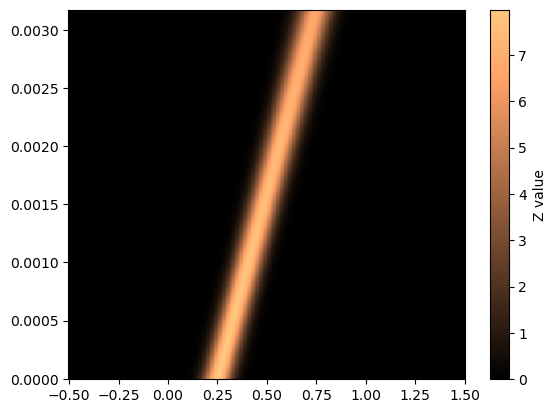

<Figure size 640x480 with 0 Axes>

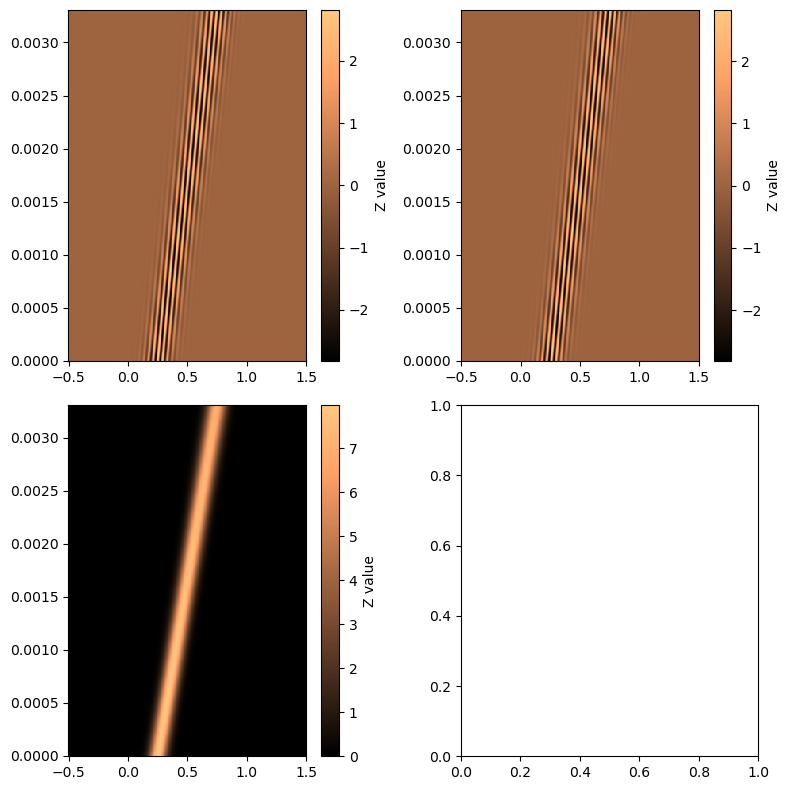

In [75]:
#drugi valovni paket

#analitična rešitev:
def psi_t(x, t, alfa, lamb, sigma0, k0):
    return np.ones_like(x) *  (2 * np.pi * sigma0**2)**(-1/4) / (np.sqrt(1+ 1j * t/(2*sigma0**2))) * np.exp((-(x-lamb)**2 / (2*sigma0)**2 + 1j * k0 * (x - lamb) - 1j * k0**2 * t/2)/(1 + 1j * t/(2*sigma0**2)))

def psi_0(x, alfa, lamb, sigma0, k0):
    return (2 * np.pi * sigma0**2)** (-1/4) * np.exp(1j * k0 * (x-lamb)) * np.exp(-(x-lamb)**2 / (2 * sigma0)**2)

sigma0 = 1/20
# sigma0 = 1
k0 = 50 * np.pi
omega = 0.2
k = omega ** 2
lamb = 0.25
alfa = np.sqrt(omega)
a = -0.5
b = 1.5
# N = 1000
N = 300
x = np.linspace(a, b, N)
dx = x[1] - x[0]
T = 2* np.pi / omega
# Nt = 10000
dt = 2*dx**2/10
# t = np.linspace(0, 1*T, Nt)
t = np.arange(0,1*T, dt)
# dt = T / Nt
dt = t[1] - t[0]
x1, t1 = np.meshgrid(x, t)


#anal:
plt.figure()
psis = []
ti = 0
psi =psi_t(x, ti, alfa, lamb, sigma0, k0)
xav = x[np.argmax(psi)]
psis.append(psi)
ts = [ti]
xavs = [xav]
while xav < 0.75:
    ti = ti + dt
    z = psi_t(x, ti, alfa, lamb, sigma0, k0)
    psis.append(z)
    ts.append(ti)
    xav = x[np.argmax(np.abs(z))]
    xavs.append(xav)
    # plt.plot(x, np.abs(z)**2)
    # print(xav)
# print(len(ts))
x1, t1 = np.meshgrid(x, ts)
psis = np.array(psis)
# print(psis)
# z0 = psi_0(x, alfa, lamb, sigma0, k0)
# print(np.shape(z0))
plt.figure()
plt.pcolormesh(x1, t1, np.abs(psis)**2, cmap='copper')
plt.colorbar(label='Z value')
# plt.imshow(np.abs(psis)**2, cmap='viridis', extent=[0,1,0,1])
np.save('x_1a1', x)
np.save('ts_1a1', ts)
np.save('psis_1a1', psis)
np.save('xavs_1a1', xavs)


# plt.figure()
# plt.plot(x, np.abs(z[-1,:])**2)    
# plt.plot(x, np.abs(z0)**2)    
# plt.yscale('log')
# print(x,np.abs(z0)**2)


#numerical:
#ce najprej zmnozimo vektor
plt.figure()
V = np.zeros_like(x)
d0 = 1 + 1j*dt*5/ (8*dx**2) + 1j * dt/2 * V
d1 = - 1j * dt / (3*dx**2)
d2 = 1j * dt / (48*dx**2)
A = + np.diag(d0) + np.diag(np.ones(N-1) * d1,1) + np.diag(np.ones(N-1) * d1,-1) + np.diag(np.ones(N-2) * d2,2) + np.diag(np.ones(N-2) * d2,-2)
Ak = np.conjugate(np.transpose(A)) #hermitirana
# main_d = np.ones(N) * a
# submain_d = np.ones(N-2) * a
# A_banded = np.vstack((submain_d, main_d, submain_d))

# print(A)
# print(Ak)

psis = []
ti = 0
psi =psi_t(x, ti, alfa, lamb, sigma0, k0)
xav = x[np.argmax(psi)]
psis.append(psi)
# psi = psi_0(x, alfa, lamb, sigma0, k0)
c = 0
ts = [ti]
xavs = [xav]
while xav < 0.75:
    ti = ti + dt
    z = psi_t(x, ti, alfa, lamb, sigma0, k0)
    # psi = scipy.linalg.solve_banded((1,1),A_banded, Ak @ psi)
    psi = la.solve(A, Ak @ psi)
    # psi = psi / la.norm(psi)
    ts.append(ti)
    psis.append(psi)
    xav = x[np.argmax(np.abs(psi))]
    xavs.append(xav)
    # print(xav)
    # plt.plot(x, np.abs(psi)**2)
    # print(xav)
    # if c == 100000:
    #     break
    # c += 1
# print(len(ts))
x1, t1 = np.meshgrid(x, ts)
np.save('x_11', x)
np.save('ts_11', ts)
np.save('psis_11', psis)
np.save('xavs_11', xavs)



# for i in range(Nt):
#     psis.append(psi)
#     psi = la.solve(A, Ak @ psi)
#     # psi = la.inv(A) @ Ak @ psi
#     psi = psi / la.norm(psi)
# plt.figure()
fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

mesh = axs[0,0].pcolormesh(x1,t1, np.real(psis), cmap='copper')
plt.colorbar(mesh, label='Z value', ax=axs[0,0])

mesh = axs[0,1].pcolormesh(x1,t1, np.imag(psis), cmap='copper')
plt.colorbar(mesh, label='Z value', ax=axs[0,1])

mesh = axs[1,0].pcolormesh(x1,t1, np.abs(psis)**2, cmap='copper')
plt.colorbar(mesh, label='Z value', ax=axs[1,0])
plt.tight_layout()




In [76]:

#anal:
xa = np.load('x_1a1.npy')
tsa = np.load('ts_1a1.npy')   
psisa = np.load('psis_1a1.npy')
xavsa = np.load('xavs_1a1.npy')

#numerical:
x = np.load('x_11.npy')
ts = np.load('ts_11.npy')
psis = np.load('psis_11.npy')
xavs = np.load('xavs_11.npy')

x1, t1 = np.meshgrid(x, ts)

fig, axs = plt.subplots(2, 2, figsize=(8, 8))  

mesh = axs[0,0].pcolormesh(x1,t1, np.real(psis), cmap='copper')
# plt.colorbar(mesh, label='Z value', ax=axs[0,0])

mesh = axs[0,1].pcolormesh(x1,t1, np.imag(psis), cmap='copper')
cax = fig.add_axes([1.0, 0.53, 0.02, 0.45])

cmap = plt.get_cmap("copper")
norm = Normalize(vmin=np.min(np.imag(psis)), vmax=np.max(np.imag(psis)))
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[0,1],location='right')
cbar.set_label(r'', fontsize=12)

# plt.colorbar(mesh, label='Z value', ax=axs[0,1])

cmap = plt.get_cmap("copper")
norm = Normalize(vmin=min(ts), vmax=max(ts))
for ind,psi in enumerate(psis):
    if ind % 10 == 0:
        # print(ind)
        # axs[1,1].plot(x, np.abs(psi)**2,color=cmap(norm(ts[ind])))#, label=f'{ts[ind]:.2f}')
        axs[1,0].plot(x, np.real(psi),color=cmap(norm(ts[ind])))#, label=f'{ts[ind]:.2f}')
        axs[1,1].plot(x, np.imag(psi),color=cmap(norm(ts[ind])))#, label=f'{ts[ind]:.2f}')
cax = fig.add_axes([1.0, 0.04, 0.02, 0.46])

cmap = plt.get_cmap("copper")
norm = Normalize(vmin=min(ts), vmax=max(ts[1:]))
cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[1,1],location='right')
cbar.set_label(r't (čas)', fontsize=12)

# cax = fig.add_axes([0.5, 0.04, 0.02, 0.46])

# cmap = plt.get_cmap("copper")
# norm = Normalize(vmin=min(ts), vmax=max(ts[1:]))
# cbar = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm),cax=cax, ax=axs[0,1],location='right')
# cbar.set_label(r't (čas)', fontsize=12)

axs[1,0].grid()
axs[1,1].grid()
axs[1,0].set_xlabel(r'x (položaj)', fontsize=12)
axs[1,1].set_xlabel(r'x (položaj)', fontsize=12)
axs[1,0].set_ylabel(r'$Re(\psi)$', fontsize=12)
axs[1,1].set_ylabel(r'$Im(\psi)$', fontsize=12)
axs[0,0].set_ylabel(r't (čas)', fontsize=12)
axs[0,1].set_ylabel(r't (čas)', fontsize=12)
axs[0,0].set_title(r'$Re(\psi)$', fontsize=12)
axs[0,1].set_title(r'$Im(\psi)$', fontsize=12)


# mesh = axs[1,0].plot(x1,t1, np.abs(psis)**2, cmap='copper')
# plt.colorbar(mesh, label='Z value', ax=axs[1,0])
plt.tight_layout()
# plt.savefig("brez_pot_2",bbox_inches='tight')


/var/folders/1l/8qyzjsmx231gm5fbpjts8n6c0000gn/T/ipykernel_97571/252956157.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


370


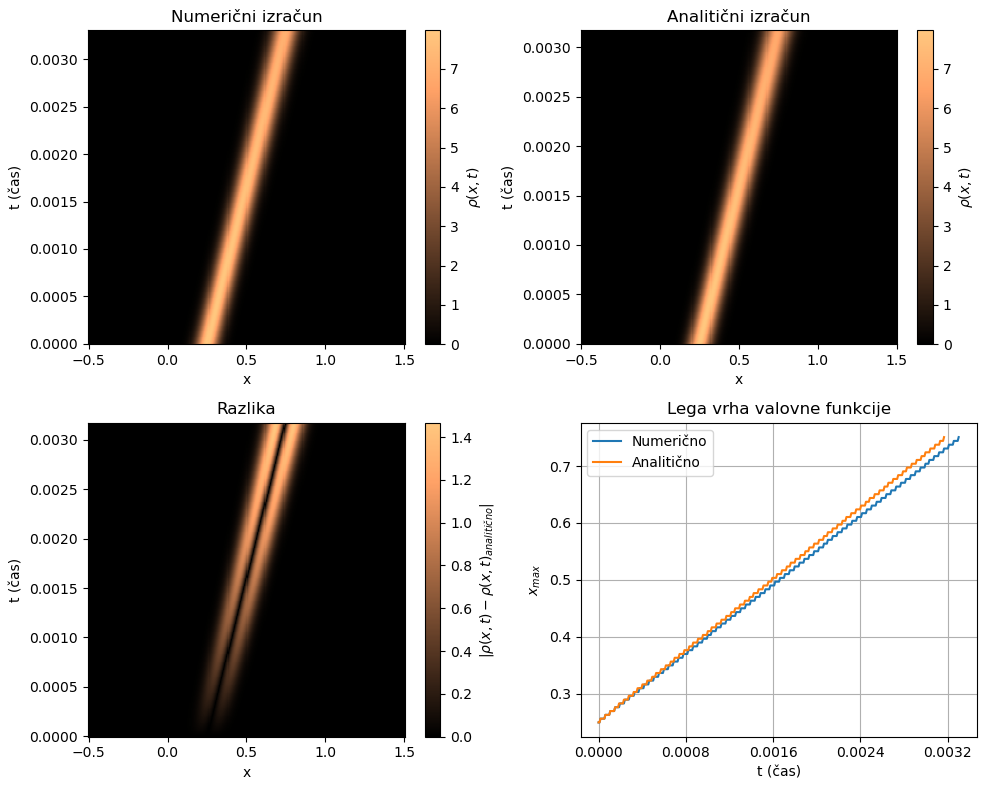

In [78]:
#anal:
xa = np.load('x_1a1.npy')
tsa = np.load('ts_1a1.npy')   
psisa = np.load('psis_1a1.npy')
xavsa = np.load('xavs_1a1.npy')

#numerical:
x = np.load('x_11.npy')
ts = np.load('ts_11.npy')
psis = np.load('psis_11.npy')
xavs = np.load('xavs_11.npy')

# x = x[:len(tsa)]
ts_d = ts[:len(tsa)]
psis_d = psis[:len(tsa)]

print(len(psis))


diff = []
for ind, t in enumerate(ts_d):
    diff.append(np.abs(np.abs(psis_d[ind])**2 - np.abs(psisa[ind])**2))
    # diff.append(np.abs(np.real(psis_d[ind]) - np.real(psisa[ind])))

fig, axs = plt.subplots(2, 2, figsize=(10, 8))  

xd, td = np.meshgrid(x, ts_d)

x1,t1 = np.meshgrid(x, ts)
x2,t2 = np.meshgrid(xa, tsa)

mesh1 = axs[0,0].pcolormesh(x1,t1, np.abs(psis)**2, cmap='copper')
mesh2 = axs[0,1].pcolormesh(x2,t2, np.abs(psisa)**2, cmap='copper')


mesh = axs[1,0].pcolormesh(xd,td, diff, cmap='copper')
plt.colorbar(mesh, label=r'$|\rho(x,t) - \rho(x,t)_{analitično}|$', ax=axs[1,0])
plt.colorbar(mesh1, label=r'$\rho(x,t)$', ax=axs[0,0])
plt.colorbar(mesh2, label=r'$\rho(x,t)$', ax=axs[0,1])



axs[1,1].plot(ts, xavs, label='Numerično')
axs[1,1].plot(tsa, xavsa, label='Analitično')
axs[1,1].legend()
axs[1,1].grid()

# from matplotlib.ticker import FormatStrFormatter

axs[1,1].xaxis.set_major_locator(plt.MaxNLocator(6))

axs[0,0].set_xlabel(r'x')
axs[0,1].set_xlabel(r'x')
axs[1,0].set_xlabel(r'x')
axs[1,1].set_xlabel(r't (čas)')
axs[0,0].set_ylabel(r't (čas)')
axs[0,1].set_ylabel(r't (čas)')
axs[1,0].set_ylabel(r't (čas)')
axs[1,1].set_ylabel(r'$x_{max}$')
axs[0,0].set_title(r'Numerični izračun')
axs[0,1].set_title(r'Analitični izračun')
axs[1,0].set_title(r'Razlika')
axs[1,1].set_title(r'Lega vrha valovne funkcije')

plt.tight_layout()
plt.savefig('brez_pot_1_visji')
